### **multi-level perceptron from scratch**

---



In [71]:
import numpy as np
import matplotlib.pyplot as plt


In [72]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [73]:
def sigmoid_derivative(x):
  s = sigmoid(x)
  return s * (1 - s)

In [74]:


X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])

y = np.array([[0],
              [0],
              [0],
              [1]])


In [75]:
np.random.seed(42)

input_size = 2
hidden_size = 4
output_size = 1

W1 = np.random.randn(input_size, hidden_size) * 0.1
b1 = np.zeros((1, hidden_size))

W2 = np.random.randn(hidden_size, output_size) * 0.1
b2 = np.zeros((1, output_size))


In [76]:
learning_rate = 0.1
epochs = 500

losses = []


In [77]:
for epoch in range(epochs):


    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)

    z2 = np.dot(a1, W2) + b2
    y_hat = sigmoid(z2)


    loss = np.mean((y - y_hat)**2)
    losses.append(loss)


    error_output = y_hat - y
    dW2 = np.dot(a1.T, error_output)
    db2 = np.sum(error_output, axis=0, keepdims=True)

    error_hidden = np.dot(error_output, W2.T) * sigmoid_derivative(a1)
    dW1 = np.dot(X.T, error_hidden)
    db1 = np.sum(error_hidden, axis=0, keepdims=True)


    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1


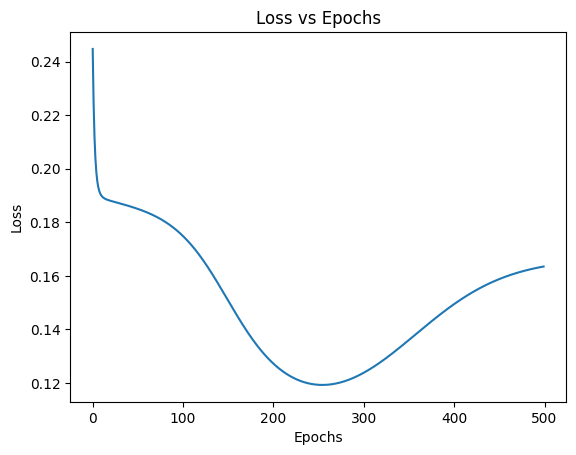

In [78]:
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.show()


In [79]:
print("Final Predictions:")
print(np.round(y_hat, 3))


Final Predictions:
[[0.002]
 [0.332]
 [0.332]
 [0.341]]


In [80]:
test_input = np.array([[1, 0]])
z1 = np.dot(test_input, W1) + b1
a1 = sigmoid(z1)
z2 = np.dot(a1, W2) + b2
prediction = sigmoid(z2)

print("Test Input:", test_input)
print("Prediction:", prediction)


Test Input: [[1 0]]
Prediction: [[0.33188547]]
